In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
 
plt.style.use("seaborn")

In [8]:
#generating dataset
x = np.linspace(0,1,100) #100 random no.s
noise = np.random.normal(loc = 0, scale = 0.25, size = 100) #adding noise to datatset
y=np.sin(x*1.5*np.pi) #actual data if from sin function
y_noise = y + noise

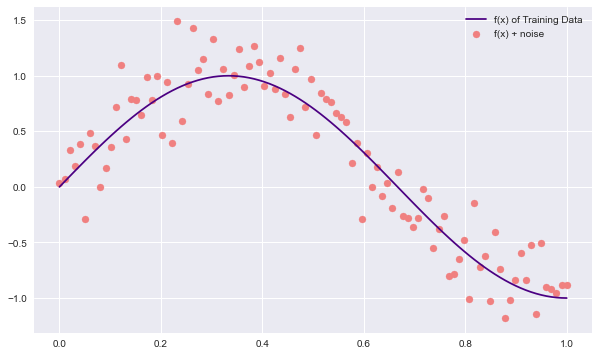

In [9]:
plt.figure(figsize=(10,6))
plt.plot(x,y,color = 'indigo', label = 'f(x) of Training Data')
plt.scatter(x,y_noise, color = 'lightcoral', label = 'f(x) + noise')

plt.legend()
plt.show()

In [10]:
from scipy import linalg

def lwr(x, y, xtest, tau=0.05):
  ypred = np.zeros(len(xtest)) #initialising

  for i in range(len(xtest)):
    weights = np.array([np.exp(-(x-xtest[i])**2 / (2*tau**2))])
    #weights - 2D array [[100elems]] - outer array has only 1 elem  
    b = np.array([np.sum(weights * y), np.sum(weights * y * x)])
    A = np.array([[np.sum(weights), np.sum(weights * x)],
                    [np.sum(weights * x), np.sum(weights * x * x)]])

    # inverseA = linalg.inv(A) #internally this is what happening
    # theta = inverseA.dot(b)
    theta = linalg.solve(A, b)
    ypred[i] = theta[0] + theta[1] * xtest[i]
  
  return ypred

In [15]:
# xtest = np.array([0.2, 0.4, 0.5, 0.8, 0.9])
xtest = np.linspace(0, 1, 50) #returns evenly spaced numbers
# print(xtest)
tau = 0.05
print(xtest[9])
ypred = lwr(x, y, xtest, tau)

tau=0.2
ypred1 = lwr(x, y, xtest, tau)

tau=1
ypred2 = lwr(x, y, xtest, tau)
#print(*zip(xtest, ypred))

0.18367346938775508


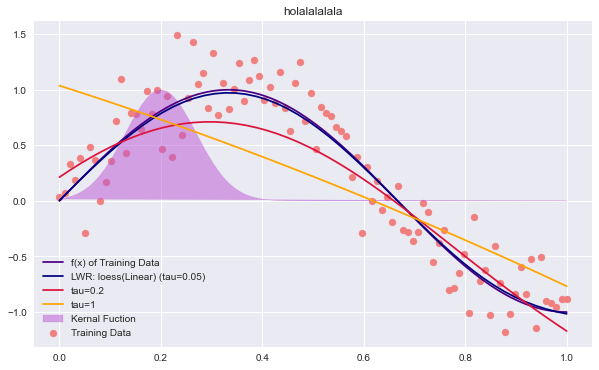

In [16]:
def kf(xi, x0, tau=0.05):
  return np.exp(-(xi-x0)**2 / (2*tau**2))


plt.figure(figsize=(10,6))
plt.title(label='holalalalala')
plt.plot(x,y,color = 'indigo', label = 'f(x) of Training Data')
plt.scatter(x,y_noise, color = 'lightcoral', label = 'Training Data')

plt.plot(xtest, ypred, color='navy', label='LWR: loess(Linear) (tau=0.05)')
plt.plot(xtest, ypred1, color='crimson', label='tau=0.2')
plt.plot(xtest, ypred2, color='orange', label='tau=1')

plt.fill(x, kf(x, 0.2, 0.07), color='mediumorchid', alpha=0.5, label='Kernal Fuction' )

plt.legend()
plt.show()